In [53]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
from pathlib import Path

In [12]:
fname = os.environ['OCIO'] = "/home/syoyo/work/OpenColorIO-Configs/spi-vfx"

In [35]:
def load_spi1d(filepath: Path):
  lines = open(filepath, 'r').readlines()

  # Version V
  version = int(lines[0].split()[1])
  assert version == 1

  # From X Y
  tup = lines[1].split()
  value_range = (float(tup[1]), float(tup[2]))

  # Length N
  tup = lines[2].split()
  n = int(tup[1])

  # Components C
  tup = lines[3].split()
  comps = int(tup[1])
  
  assert lines[4].strip().startswith("{")

  vals = []
  for l in lines[5:n+5]:
    val = float(l.strip())
    vals.append(val)

  assert lines[n+5].strip().startswith("}")

  d = {}
  d['version'] = version
  d['from'] = value_range
  d['components'] = 1
  d['data'] = vals

  return d


In [36]:
fname = "/home/syoyo/work/OpenColorIO-Configs/spi-vfx/luts/cpf.spi1d"
lut = load_spi1d(fname)

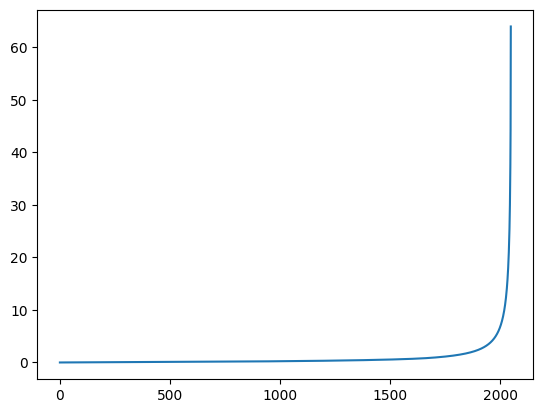

In [37]:
plt.plot(lut['data'])

In [40]:
xs = np.linspace(lut['from'][0], lut['from'][1], len(lut['data']))

In [64]:
ndeg = 3
f = np.poly1d(np.polyfit(xs, lut['data'], ndeg))

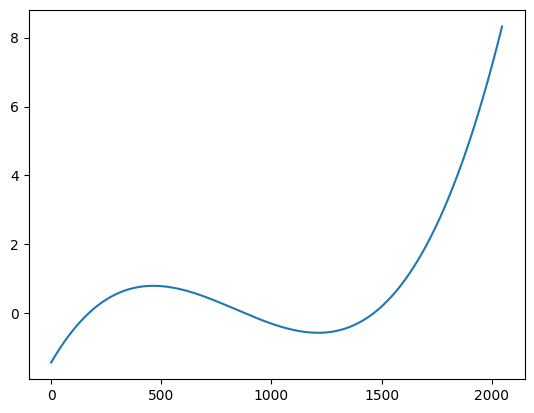

In [65]:
plt.plot(f(xs))

In [54]:
f = scipy.interpolate.interp1d(xs, lut['data'], kind='cubic')

In [55]:
ydash = f(xs)

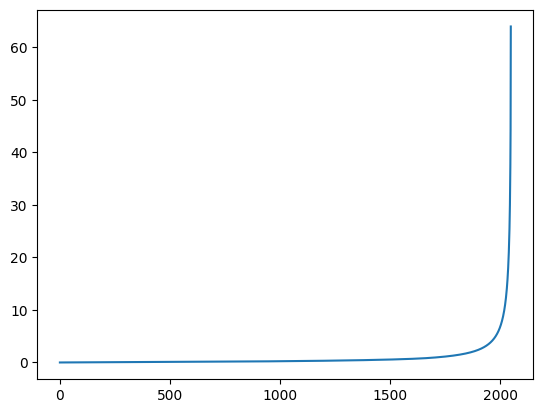

In [57]:
plt.plot(ydash)